# Building your own layer

Based on [this keras page](https://keras.io/layers/writing-your-own-keras-layers/)

```
For simple, stateless custom operations, you are probably better off using layers.core.Lambda layers. But for any custom operation that has trainable weights, you should implement your own layer.
```

Here is the skeleton of a Keras layer, as of Keras 2.0 (if you have an older version, please upgrade). There are only three methods you need to implement:

- `build(input_shape)`: Called when the model containing the layer is built. This is where you will define your weights. 
- `call(x)`: this is where the layer's logic lives. Unless you want your layer to support masking, you only have to care about the first argument passed to call: the input tensor.
- `compute_output_shape(input_shape)`: in case your layer modifies the shape of its input, you should specify here the shape transformation logic. This allows Keras to do automatic shape inference.


Let's create a Dense network which uses ReLu by default as activation

In [1]:
%matplotlib inline
from keras import backend as K
from keras.engine.topology import Layer

class ReLuLayer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(ReLuLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(ReLuLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        prod = K.dot(x, self.kernel)
        return K.relu(prod)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

/home/jmperez/.pyenv/versions/3.6.5/envs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/jmperez/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


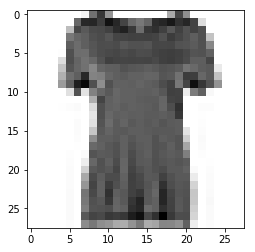

In [2]:
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

plt.imshow(np.squeeze(X_train[10]), cmap=plt.cm.gray_r)

In [3]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D


model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), input_shape=X_train[0].shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(ReLuLayer(64))
#model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile('adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [5]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 9s 158us/step - loss: 11.0900 - acc: 0.3070 - val_loss: 8.7557 - val_acc: 0.4430
Epoch 2/5
54000/54000 [==============================] - 8s 155us/step - loss: 1.9457 - acc: 0.7669 - val_loss: 0.3878 - val_acc: 0.8627
Epoch 3/5
54000/54000 [==============================] - 9s 158us/step - loss: 0.3329 - acc: 0.8800 - val_loss: 0.3547 - val_acc: 0.8738
Epoch 4/5
54000/54000 [==============================] - 9s 160us/step - loss: 0.2819 - acc: 0.8946 - val_loss: 0.3387 - val_acc: 0.8785
Epoch 5/5
54000/54000 [==============================] - 9s 163us/step - loss: 0.2482 - acc: 0.9072 - val_loss: 0.3490 - val_acc: 0.8812
